In [1]:
########################################################################
# File       : using_apeer-ometiff-library.ipynb
# Version    : 0.3
# Author     : czsrh
# Date       : 23.11.2020
# Institution : Carl Zeiss Microscopy GmbH
#
# Disclaimer: Just for testing - Use at your own risk.
# Feedback or Improvements are welcome.
########################################################################


***Reading OME-TIFF files from Python using the apeer-ometiff-library***

The APEER platform allows creating modules and workflows using basically any programming language due to its underlying Docker(TM) technology.
Nevertheless Python seems to be the favorite choice for most of the time for various reasons:

* Simple enough to be used by researchers with scripting experience
* Powerful enough to create amazing computational tools
* A huge and very open community and the whole ecosystem behind it
* Probably the most popular language when it come to topics like Machine Learning

The topic or question what is the "best" image data format for microscopy is a very interesting and also quite difficult
question. There are no easy answers and there is no right or wrong here.

Since the APEER platform tries to provide solutions our team decided that we must for sure support the currently most popular
image data format for microscoscopy image data, which clearly is OME-TIFF (despite its known limitations).
We explored "easy and simple" ways to read OME-TIFF for the most common use cases. We just want a simple python-based tool to read and write OME-TIFF without the need to include JAVA etc. into the modules.
Therefore we reused parts of the existing python ecossystem, especially python-bioformats and tifffile, added some extra code and created a basic PyPi package.

This package can be easily inclued in every APEER module but obviousy it can be also used inside our python application or within jupyter notebook.

* [PyPi - apeer-ometiff-library](https://pypi.org/project/apeer-ometiff-library/)

* [PyPi - python-bioformats](https://pypi.org/project/python-bioformats/).

More information on the source code can be found on the APEER GitHub project page: [GitHub - apeer-ometiff-library](https://github.com/apeer-micro/apeer-ometiff-library)
    
In order to make things a bit easier we create a little helper script called imgfileutils.py which can be found here

* [ZEISS GitHub OAD - imagefileutils.py](https://github.com/zeiss-microscopy/OAD/blob/master/jupyter_notebooks/Read_CZI_and_OMETIFF_and_display_widgets_and_napari/modules/imgfileutils.py)

The complete notebook can be found here:
    
* [ZEISS GitHub OAD - using_apeer-ometiff-library.ipynb](https://github.com/zeiss-microscopy/OAD/blob/master/jupyter_notebooks/Read_CZI_and_OMETIFF_and_display_widgets_and_napari/using_apeer-ometiff-library.ipynb)

Remark: The notebook uses a small subset of the original dataset because of the file size. Therefore the images used
for illustration do not exactly correspond to what one will see if using the provided test files.

In [4]:
!pip install xmltodict

In [1]:
# import the libraries
from apeer_ometiff_library import io, processing, omexmlClass

# import script with some useful functions
import sys
sys.path.append(r'modules')
import imgfileutils as imf
from IPython.display import display, HTML

In [10]:
# define your OME-TIFF file here
#filename = r"testdata\CellDivision_T=10_Z=15_CH=2_DCV_small.ome.tiff"
filename = r"3CH_Z-Stack_RN-DAPI.ome.tiff"

# extract XML and save it to disk
# xmlometiff = imf.writexml_ometiff(filename)

### Reading the OME-TIFF stack as an NumPy Array

The easily ready and OME-TIFF stack without the need to deal with the JAVA runtime the apeer-ometiff-library used the following code:
    
```python
def read_ometiff(input_path):
    with tifffile.TiffFile(input_path) as tif:
        array = tif.asarray()
        omexml_string = tif.ome_metadata

    # Turn Ome XML String to an Bioformats object for parsing
    metadata = omexmlClass.OMEXML(omexml_string)

    # Parse pixel sizes
    pixels = metadata.image(0).Pixels
    size_c = pixels.SizeC
    size_t = pixels.SizeT
    size_z = pixels.SizeZ
    size_x = pixels.SizeX
    size_y = pixels.SizeY

    # Expand image array to 5D of order (T, Z, C, X, Y)
    if size_c == 1:
        array = np.expand_dims(array, axis=-3)
    if size_z == 1:
        array = np.expand_dims(array, axis=-4)
    if size_t == 1:
        array = np.expand_dims(array, axis=-5)

    return array, omexml_string
```

In [9]:
# Read metadata and array differently for OME-TIFF by using the io function of the apeer-ometiff library
 
# Return value is an array of order (T, Z, C, X, Y)
array, omexml = io.read_ometiff(filename)

# get the metadata for the OME-TIFF file
metadata, add_metadata = imf.get_metadata(filename)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\KevinKearney\\code\\OAD-master\\jupyter_notebooks\\Read_CZI_and_OMETIFF_and_Napari\\3CH_Z-Stack_RN-DAPI.ome.tiff'

In [6]:
print(metadata)

{'Directory': 'testdata', 'Filename': 'CellDivision_T=10_Z=15_CH=2_DCV_small.ome.tiff', 'Extension': 'ome.tiff', 'ImageType': 'ometiff', 'AcqDate': '2016-02-12T09:41:02.491', 'TotalSeries': 1, 'SizeX': 256, 'SizeY': 256, 'SizeZ': 15, 'SizeC': 2, 'SizeT': 10, 'SizeS': 1, 'SizeB': 1, 'SizeM': 1, 'Sizes BF': [1, 10, 15, 2, 256, 256], 'DimOrder BF': 'XYCZT', 'DimOrder BF Array': 'TZCYX', 'Axes_czifile': None, 'Shape_czifile': None, 'czi_isRGB': None, 'czi_isMosaic': None, 'ObjNA': None, 'ObjMag': None, 'ObjID': None, 'ObjName': [], 'ObjImmersion': [], 'TubelensMag': [], 'ObjNominalMag': [], 'XScale': 0.091, 'YScale': 0.091, 'ZScale': 0.32, 'XScaleUnit': None, 'YScaleUnit': None, 'ZScaleUnit': None, 'DetectorModel': None, 'DetectorName': [], 'DetectorID': None, 'DetectorType': [], 'InstrumentID': None, 'Channels': ['LED555', 'LED470'], 'ChannelNames': [], 'ChannelColors': [], 'ImageIDs': [0], 'NumPy.dtype': None, 'Name': 'CellDivision_T=10_Z=15_CH=2_DCV_small.czi #1', 'Axes_aics': 'STCZYX',

In [7]:
print(add_metadata)

{}


In [4]:
# check the shape of numpy array containing the pixel data
print('Array Shape: ', array.shape)

# get dimension order from metadata
print('Dimension Order (BioFormats) : ', metadata['DimOrder BF Array'])

# show dimensions and scaling
print('SizeT : ', metadata['SizeT'])
print('SizeZ : ', metadata['SizeZ'])
print('SizeC : ', metadata['SizeC'])
print('SizeX : ', metadata['SizeX'])
print('SizeY : ', metadata['SizeY'])
print('XScale: ', metadata['XScale'])
print('YScale: ', metadata['YScale'])
print('ZScale: ', metadata['ZScale'])

Array Shape:  (10, 15, 2, 256, 256)
Dimension Order (BioFormats) :  TZCYX
SizeT :  10
SizeZ :  15
SizeC :  2
SizeX :  256
SizeY :  256
XScale:  0.091
YScale:  0.091
ZScale:  0.32


In [5]:
### show complete metadata

# convert metadata dictionary to a pandas dataframe
mdframe = imf.md2dataframe(metadata)

# and display it nicely as a HTML inside the jupyter notebook
display(HTML(mdframe.to_html()))

In [7]:
# Here we use the Napari viewer (https://github.com/napari/napari) to visualize the
# complete OME-TIFF stack, which is represented by a multi-dimensional NumPy Array. 

# configure napari automatically based on metadata and show the OME-TIFF stack
layers = imf.show_napari(array, metadata,
                         blending='additive',
                         gamma=0.85,
                         add_mdtable=True,
                         rename_sliders=True,
                         use_BFdims=True)

C:\Users\KevinKearney\Anaconda3\envs\ome-dev\lib\site-packages\napari\_qt\qt_event_loop.py:265: FutureWarning: 
The 'gui_qt()' context manager is deprecated.
If you are running napari from a script, please use 'napari.run()' as follows:

    import napari

    viewer = napari.Viewer()  # no prior setup needed
    # other code using the viewer...
    napari.run()

In IPython or Jupyter, 'napari.run()' is not necessary. napari will automatically
start an interactive event loop for you: 

    import napari
    viewer = napari.Viewer()  # that's it!

  warn(


Initializing Napari Viewer ...
Extract Channel as NumPy.Array
Adding Channel  :  LED555
Shape Channel   :  0 (10, 15, 256, 256)
Scaling Factors :  [1.0, 3.516, 1.0, 1.0]
Scaling:  0.0 4927.0
Extract Channel as NumPy.Array
Adding Channel  :  LED470
Shape Channel   :  1 (10, 15, 256, 256)
Scaling Factors :  [1.0, 3.516, 1.0, 1.0]
Scaling:  0.0 25331.0
Renaming the Sliders based on the Dimension String ....


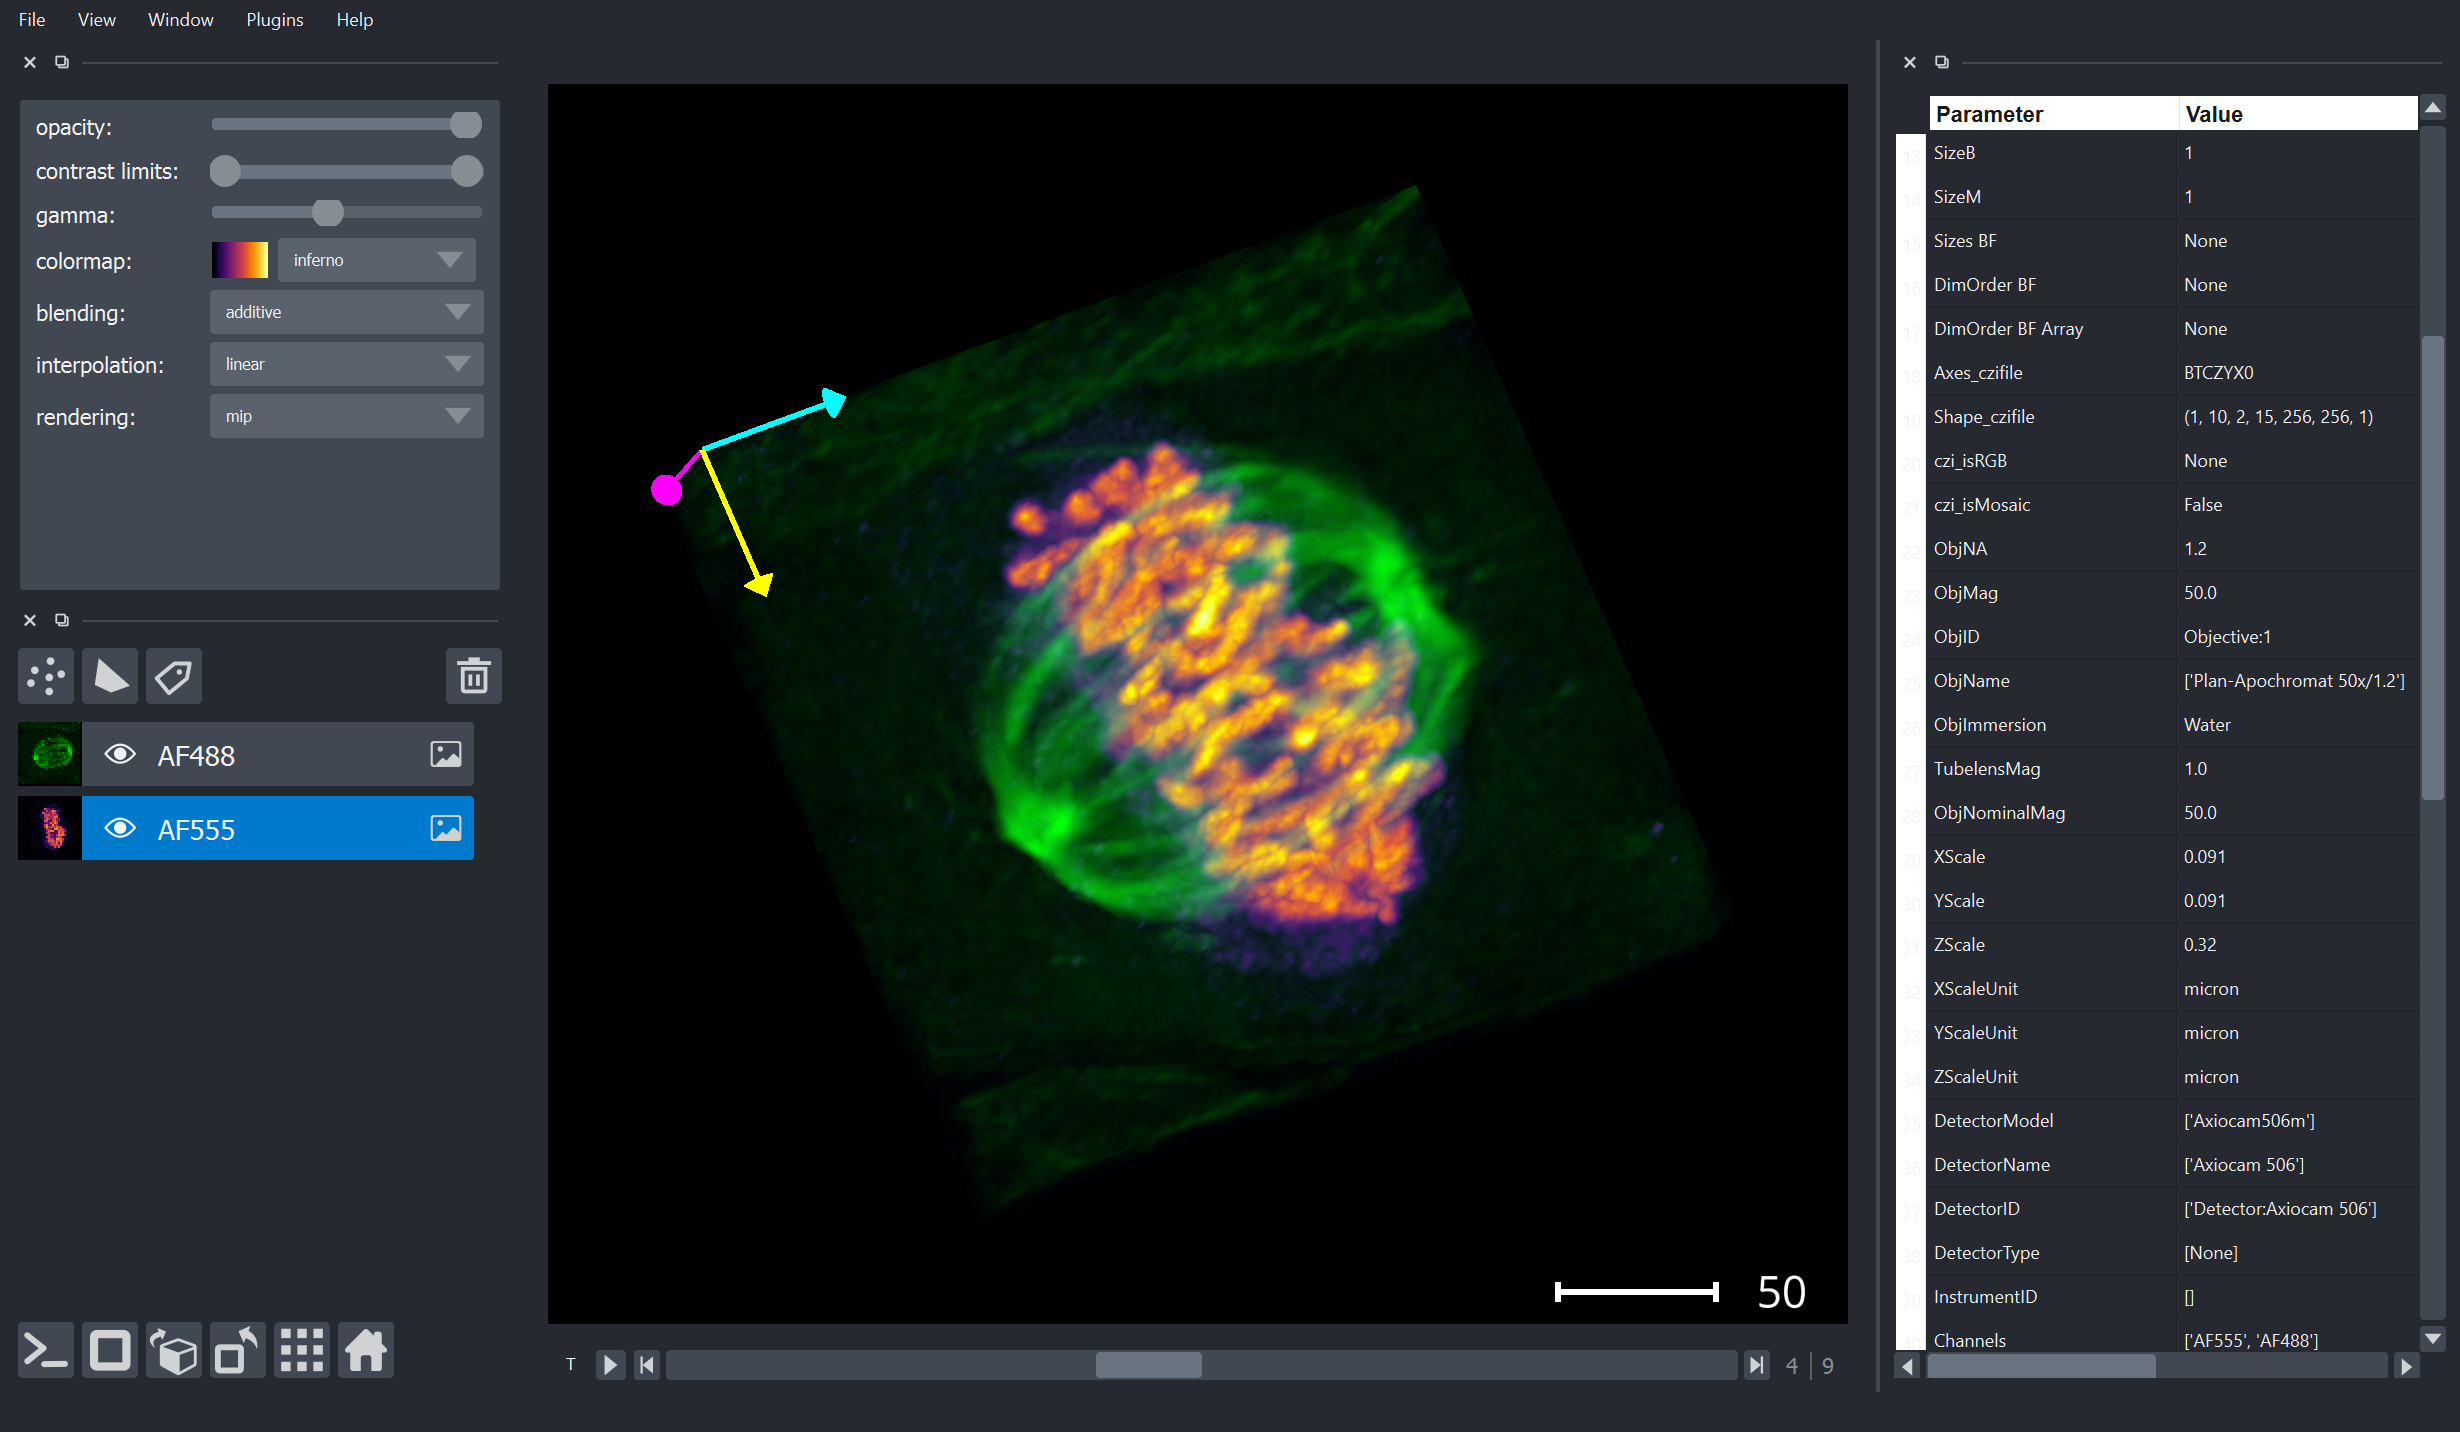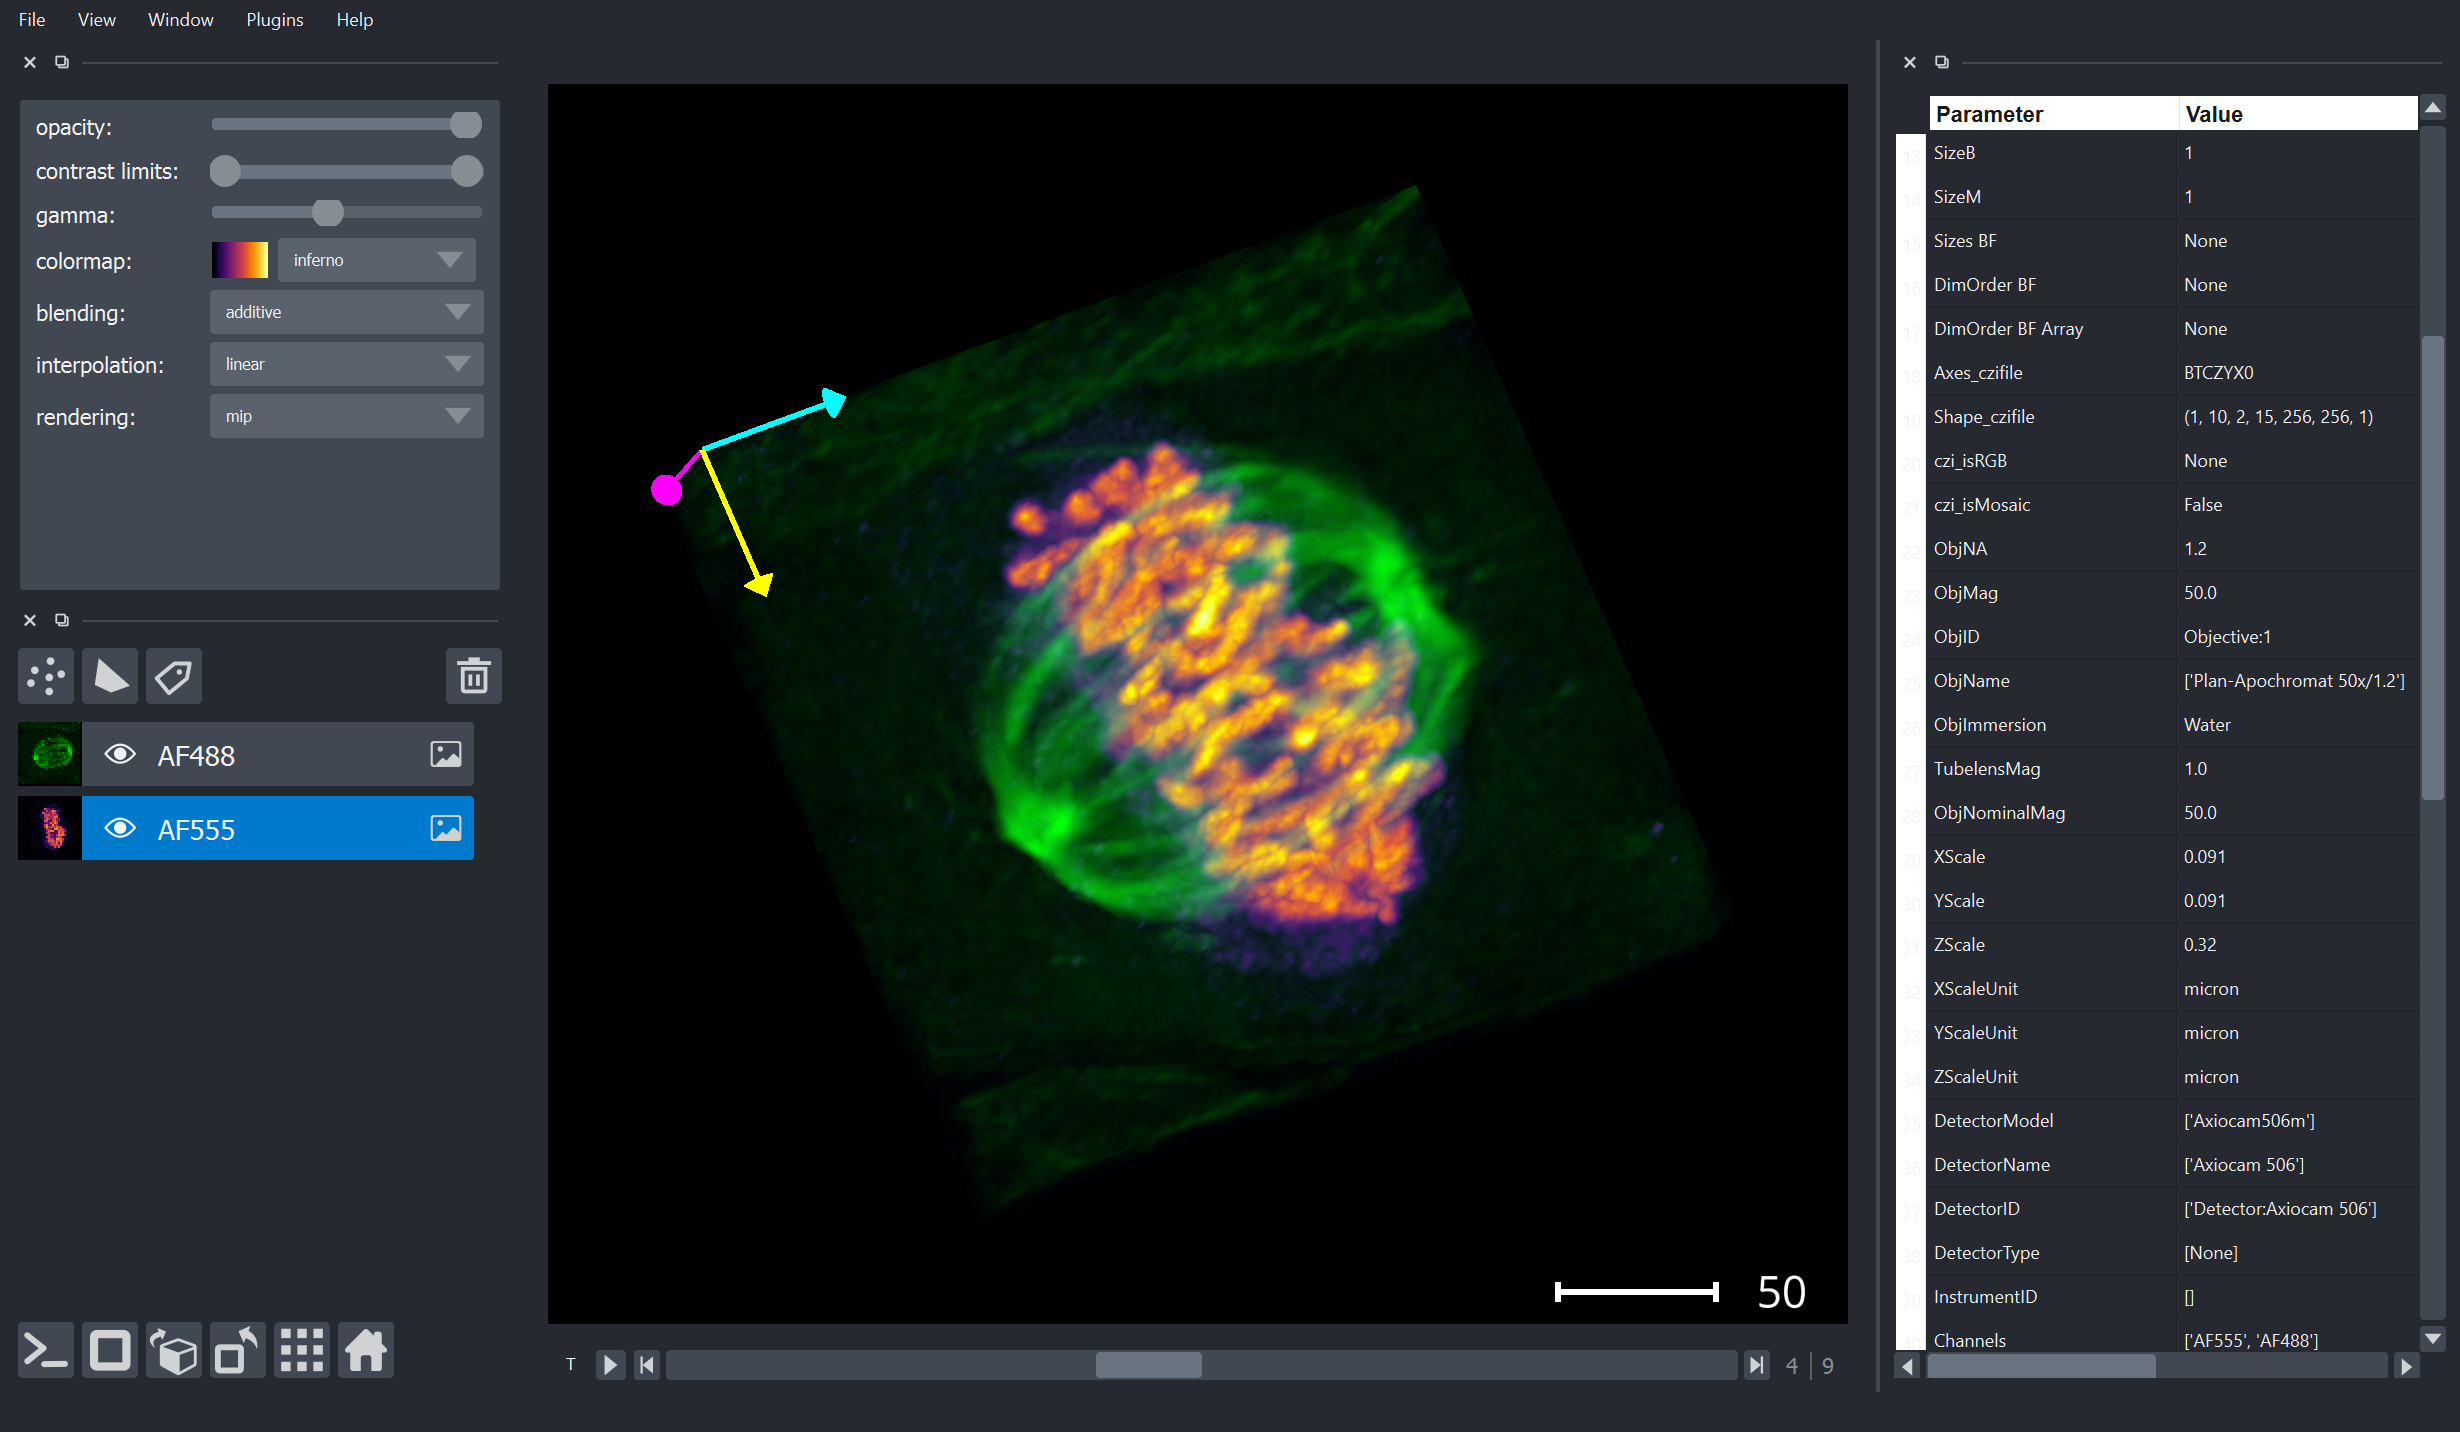<p><img src="images/display_ometiff_napari.png" title="napari Viewer with 5D stack from OME-TIFF"></p>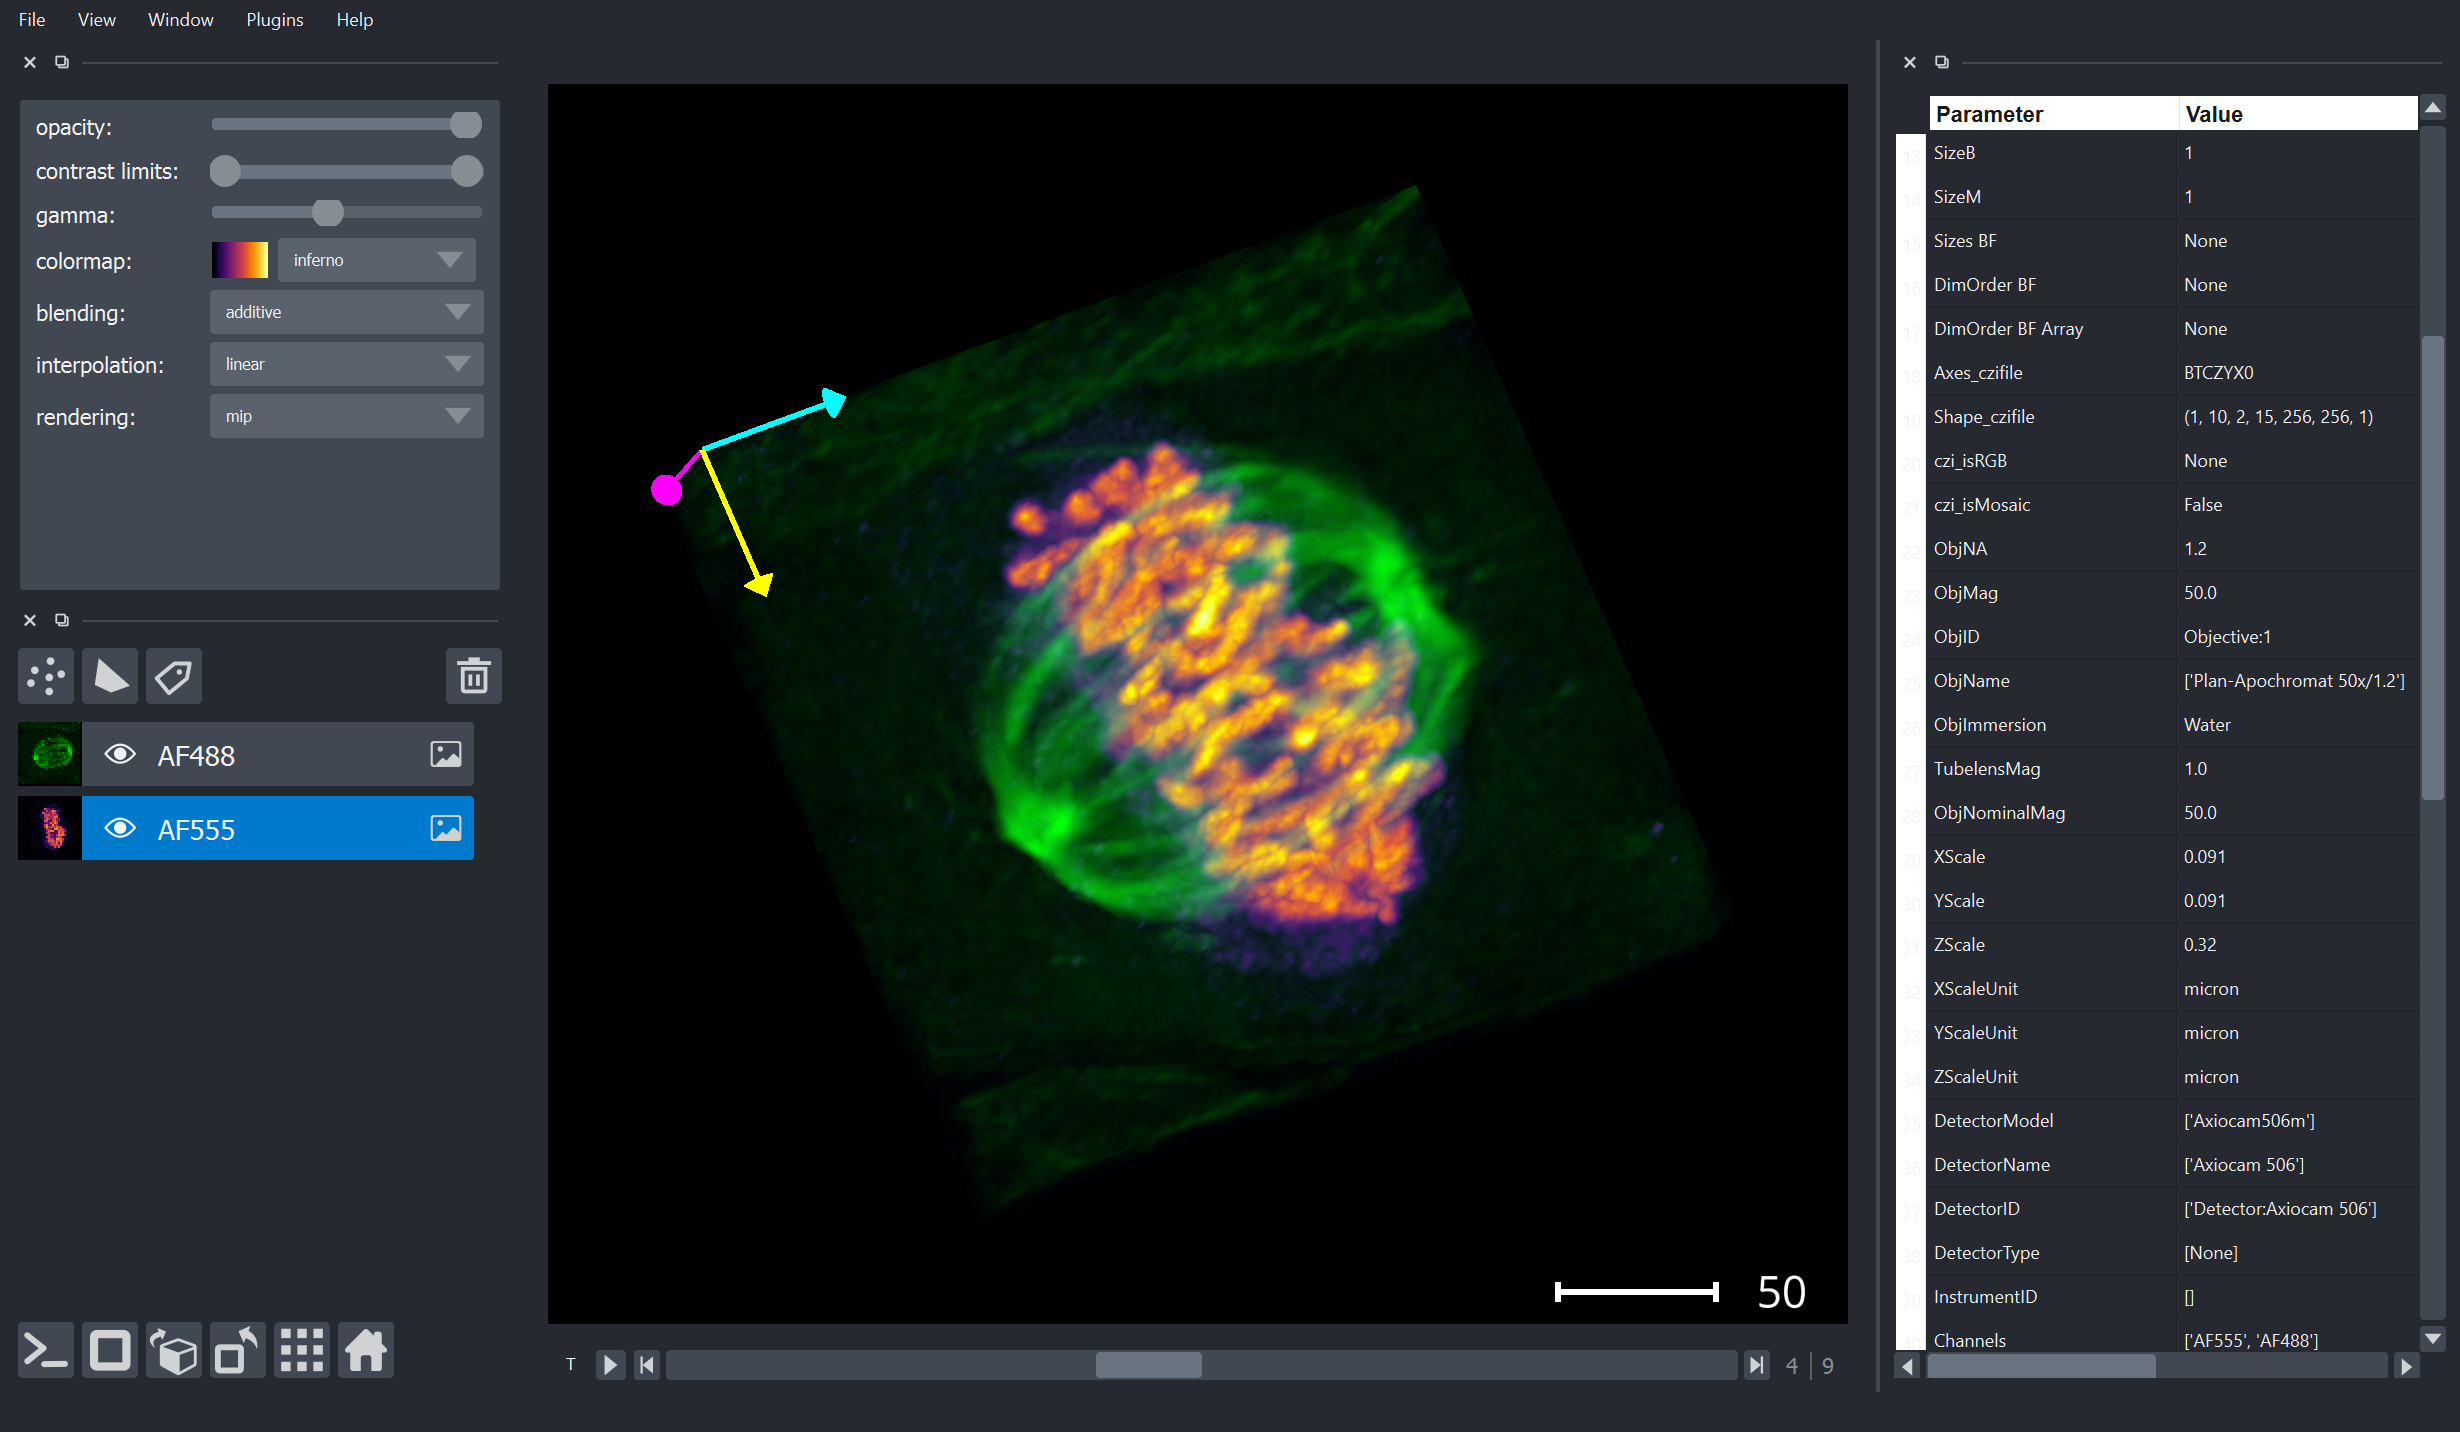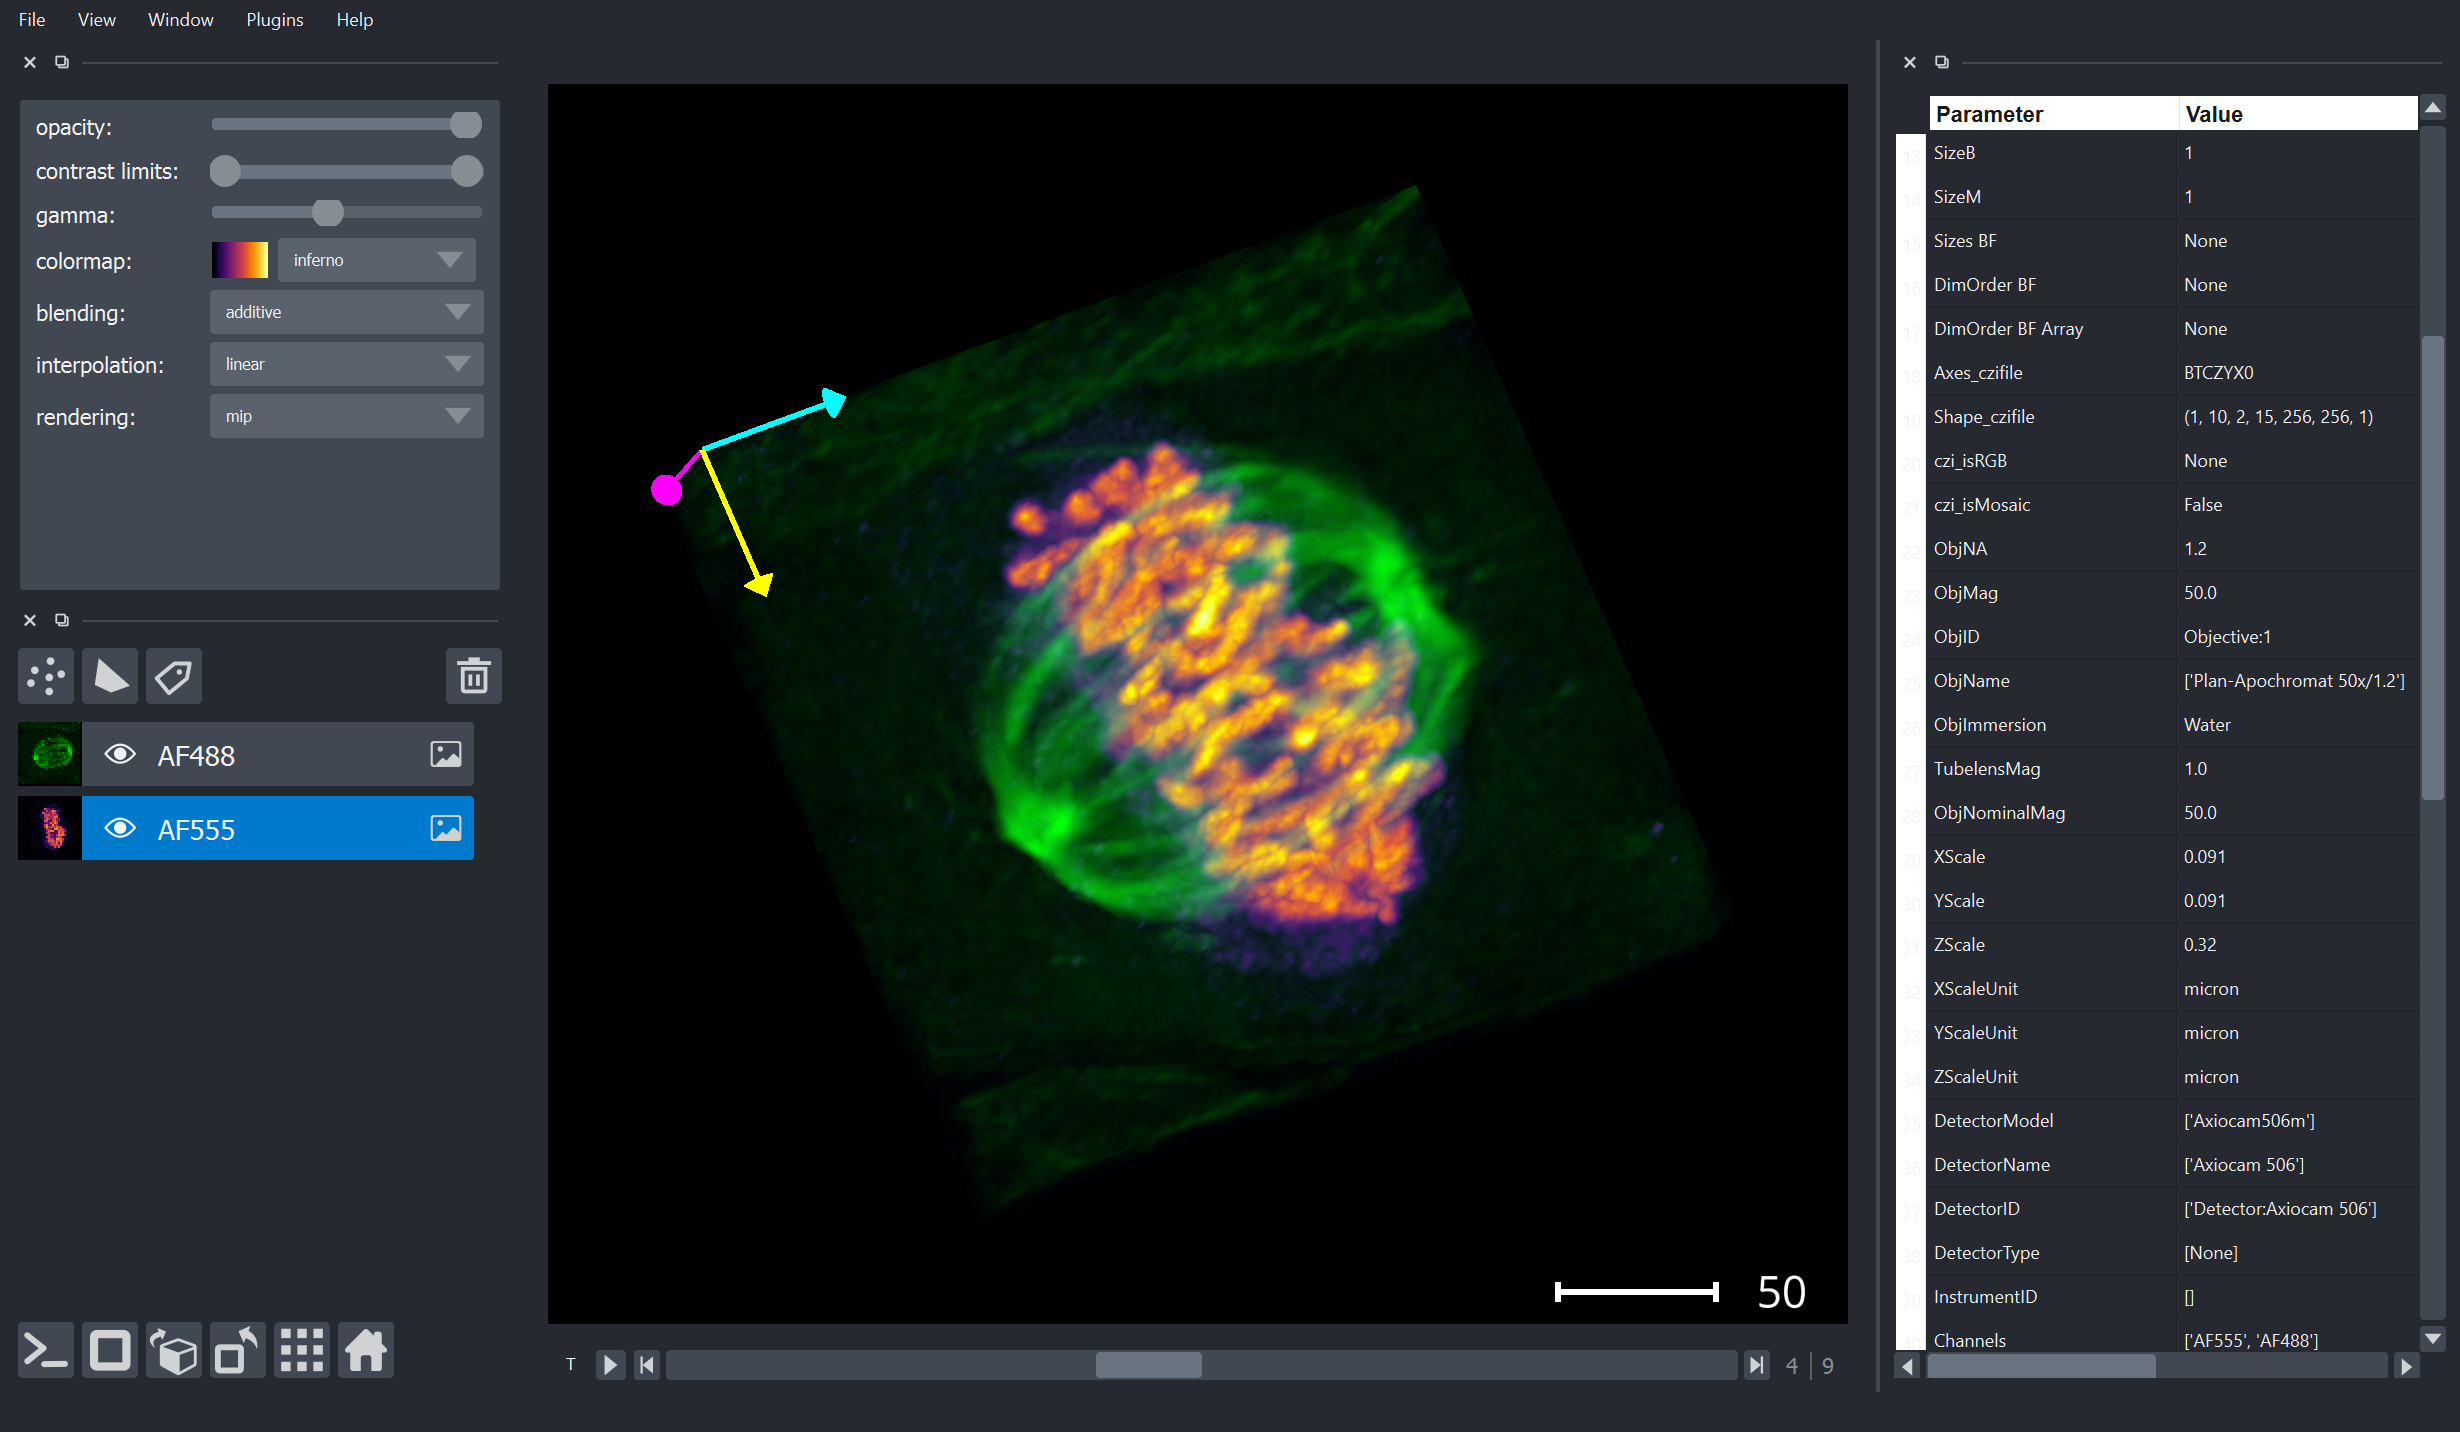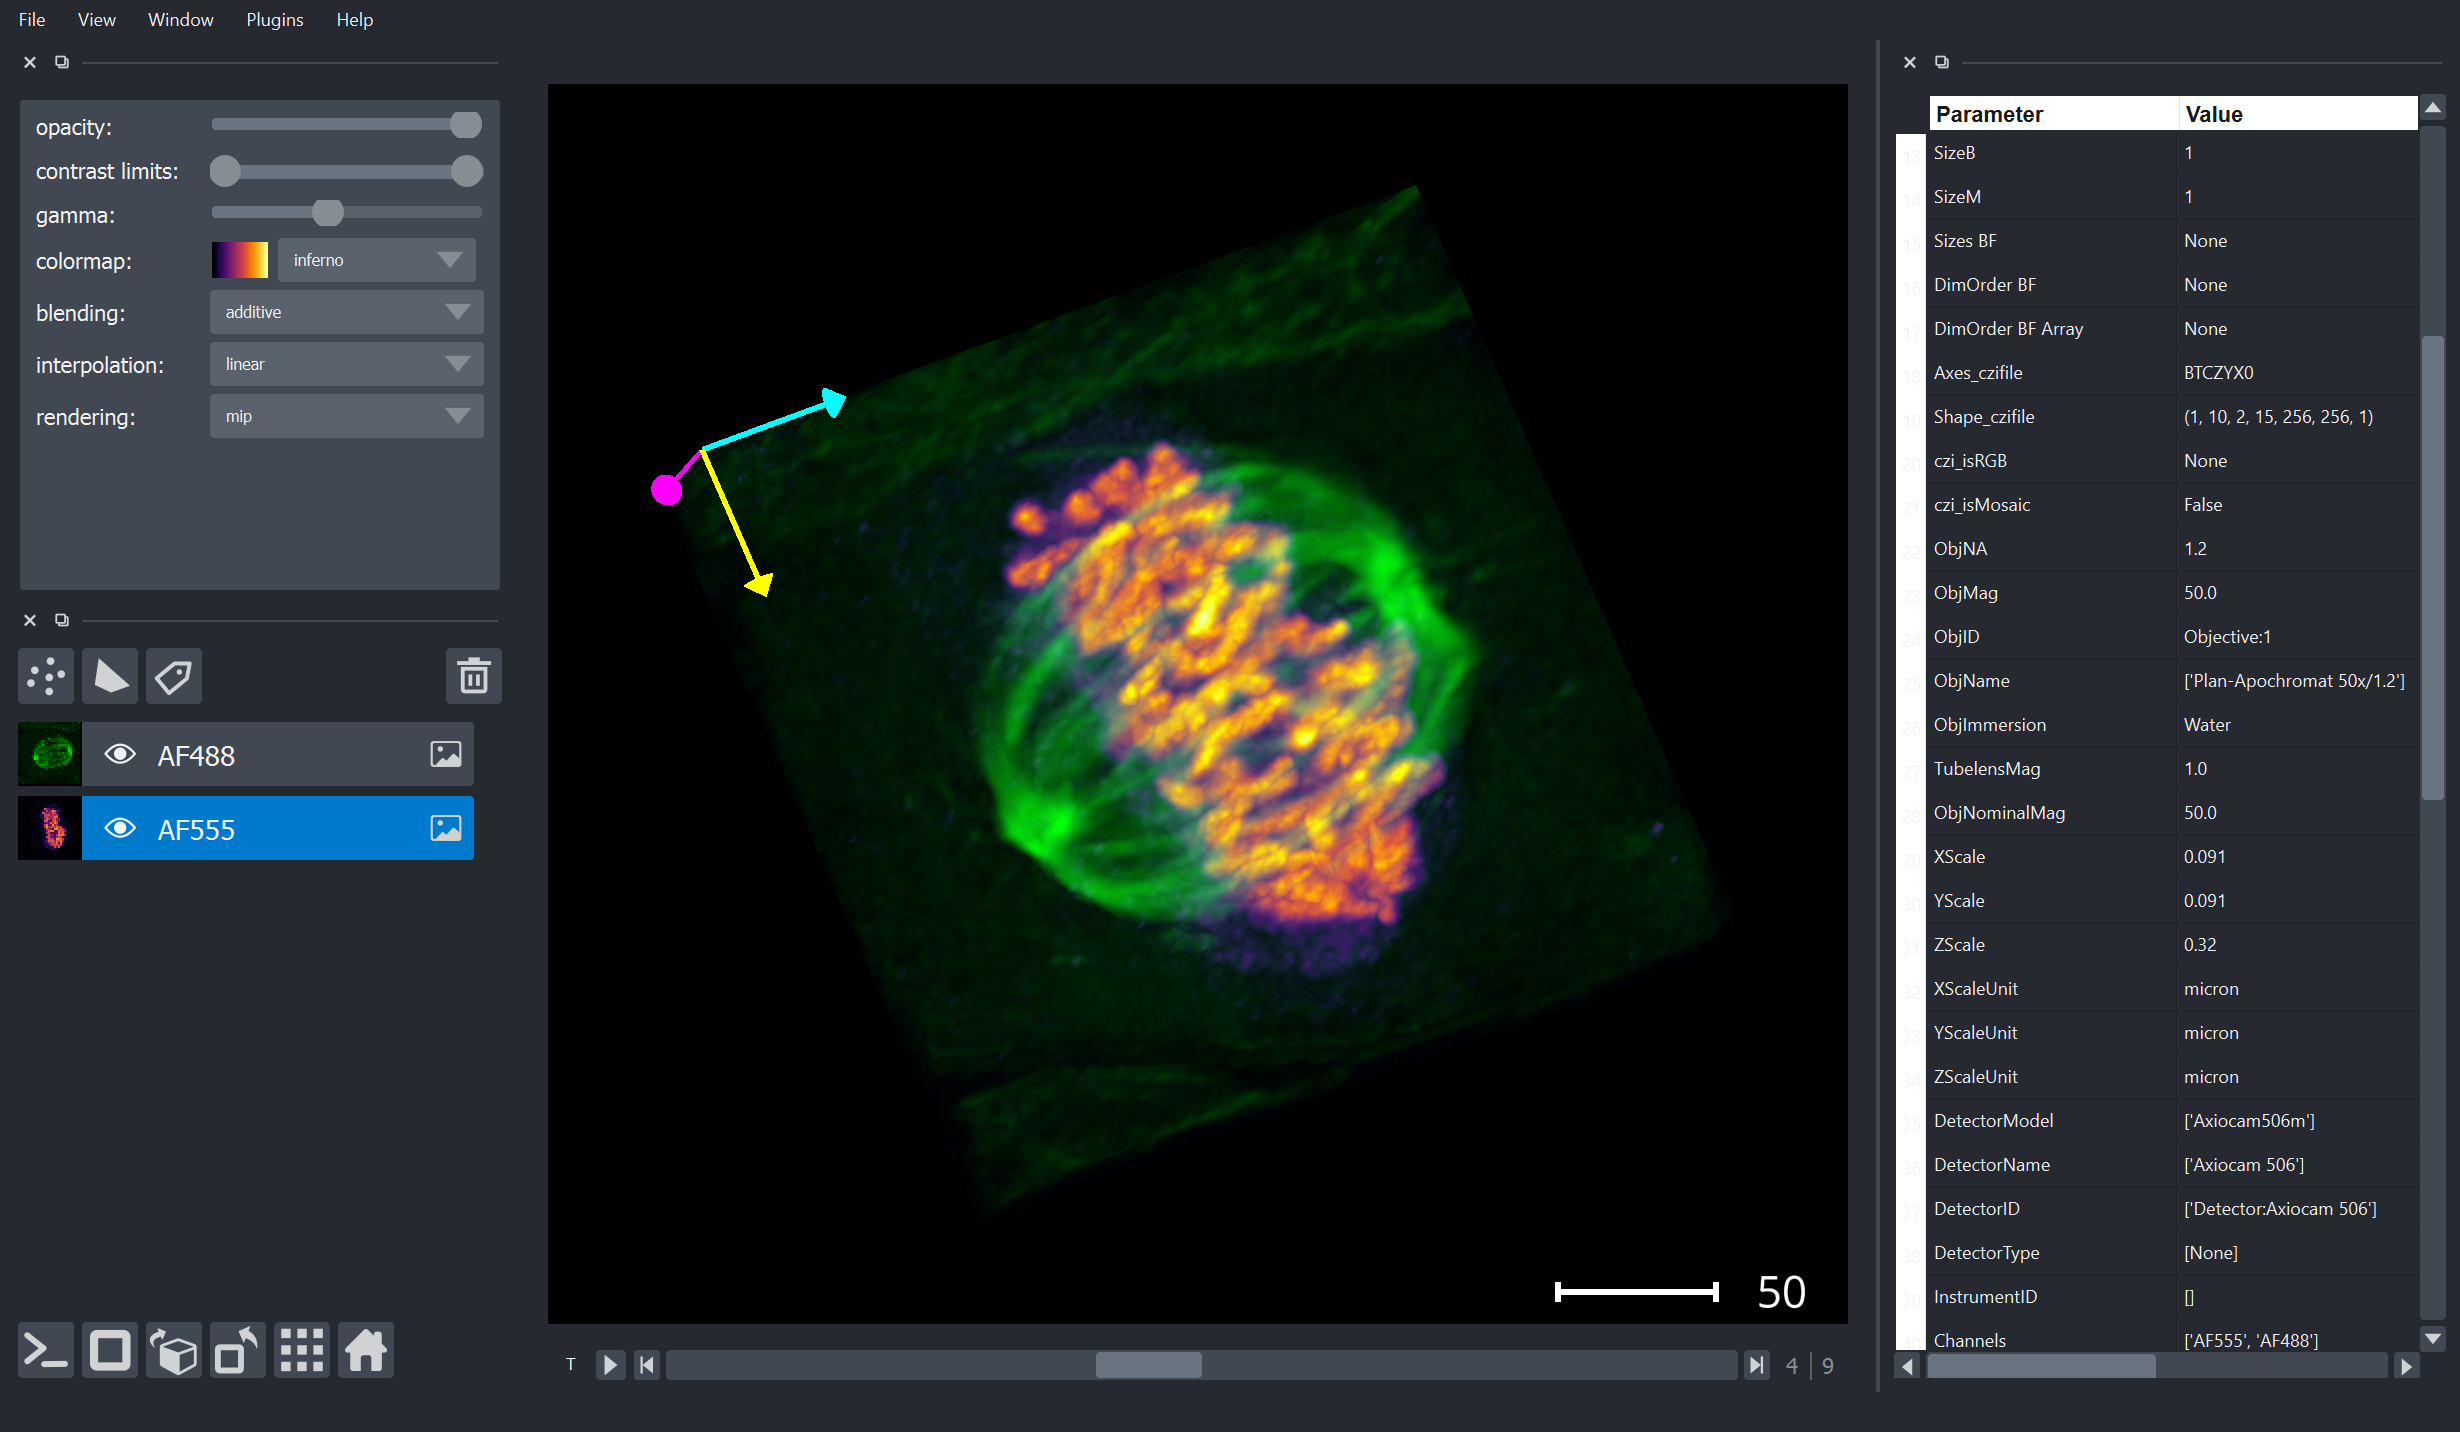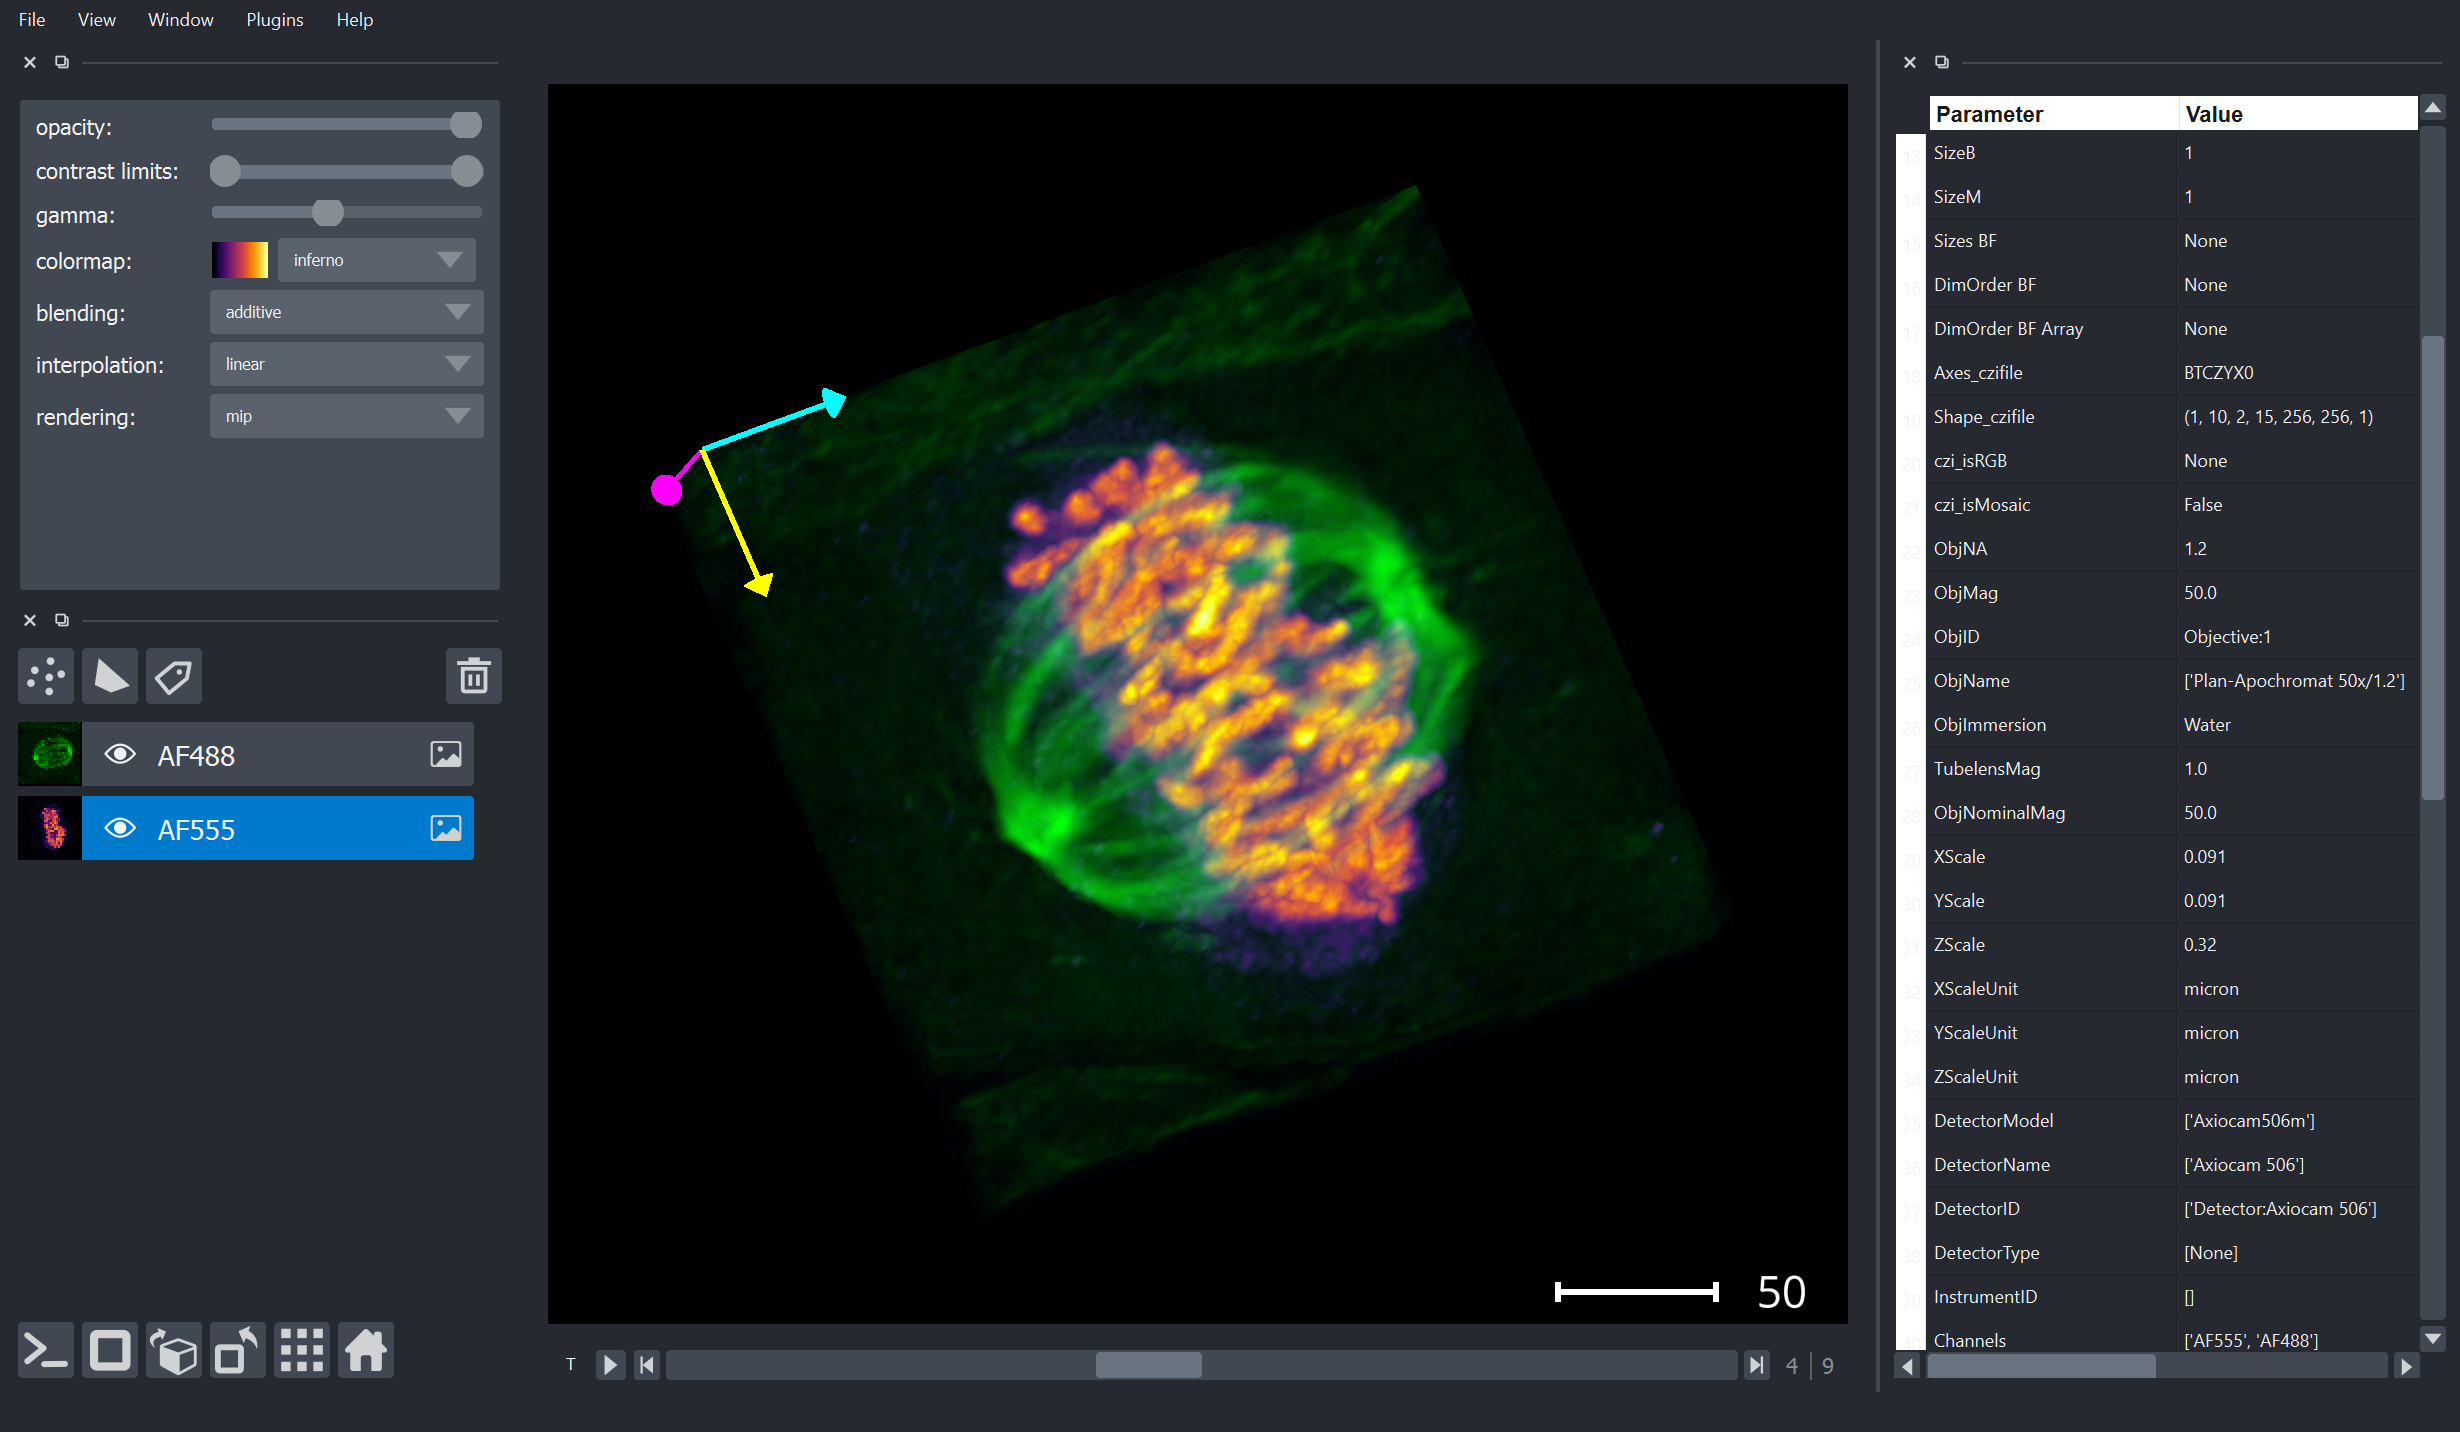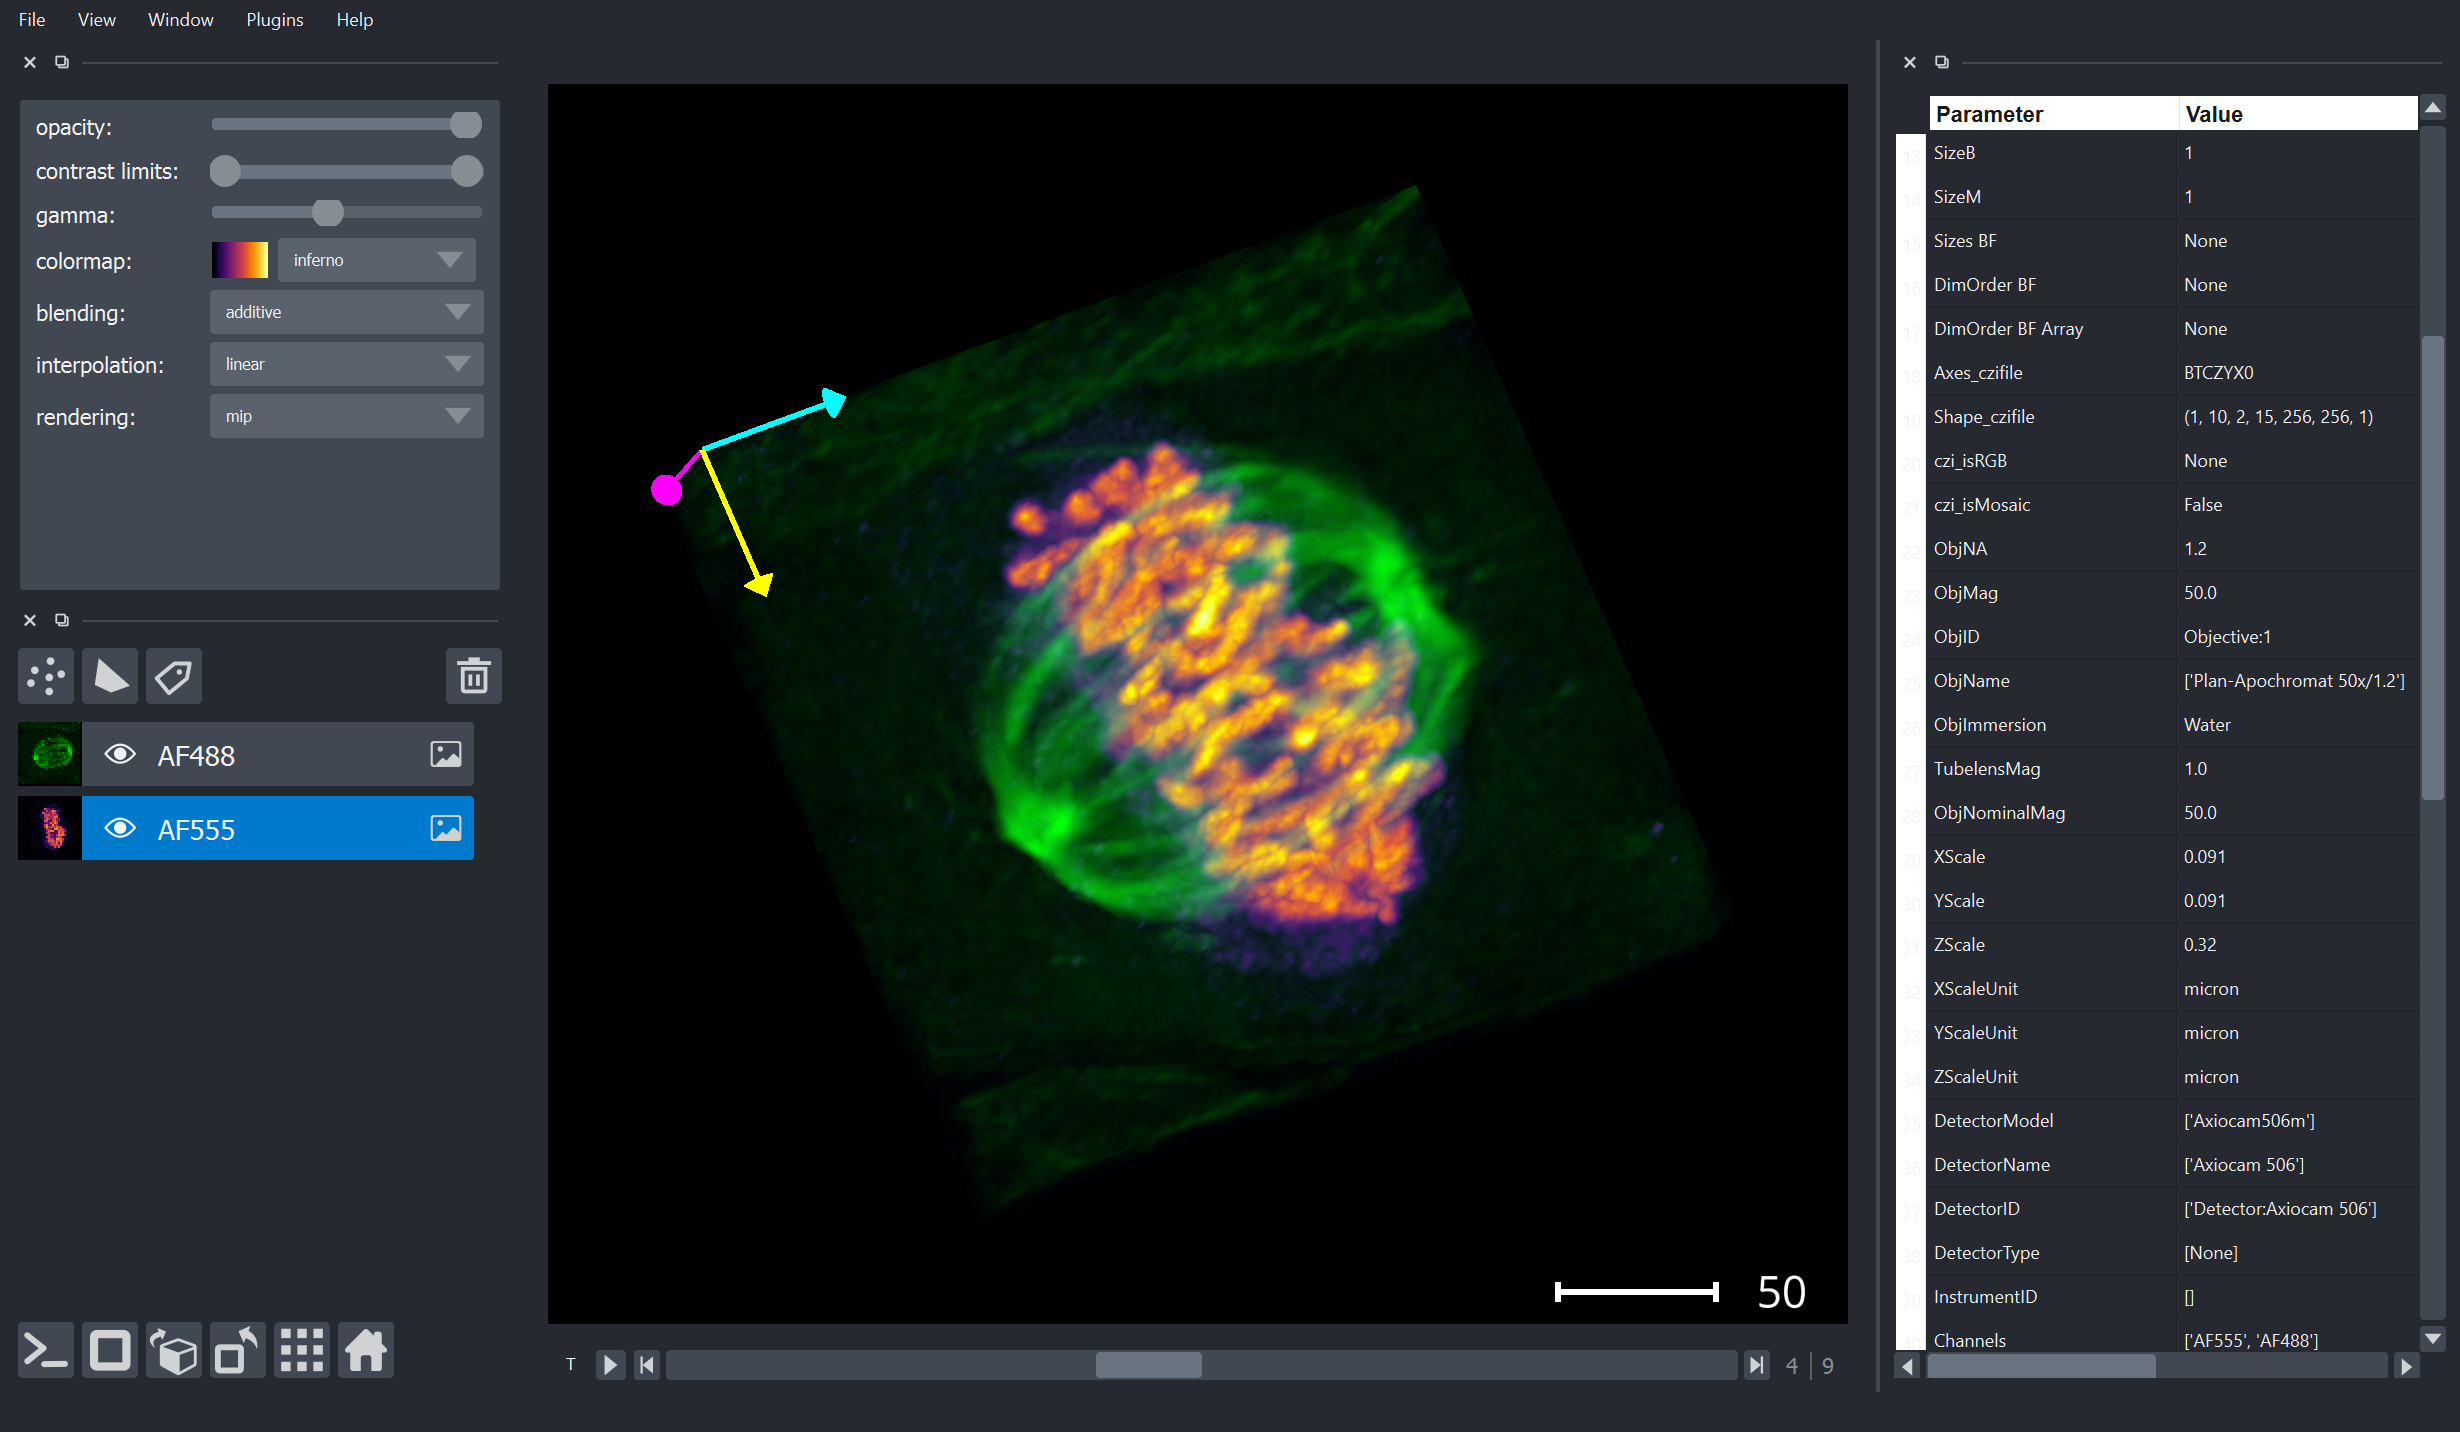

In order to create a slideshow using this notebook run the following lines from a command line:

```bash
cd c:\Users\...\jupyter_notebooks\Read_CZI_and_OMETIFF_and_display_widgets_and_napari

jupyter nbconvert using_apeer-ometiff-library.ipynb --to slides --post serve
```